In [1]:
#Importing the libraries
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import harmonize as hz

## 1. Description of the DATASETS used

### 1.1.  Leaf Area Index - MOD15A2H:
Time resolution: 8 days
Spatial resolution: 500m
Temporal coverage: 2000-2019
Spatial coverage: Global
Source: https://lpdaac.usgs.gov/products/mod15a2hv061/
variables: LAI, FPAR, FCOVER
* LAI_500: Leaf Area Index
   value range of lai_500: 0-10
* Fpar_500: Fraction of Photosynthetically Active Radiation
*
* FCOVER: Fraction of Canopy Cover

*

### 1.1. Importing the Sentinel-2 data

In [3]:
# Open the dataset with xarray
path_data = "../data/Raw/"
ndvi = xr.open_dataset(path_data +'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data +'Raw_LAI_8D_500m.nc')
evap = xr.open_dataset(path_data +'Raw_evap_8D_500m.nc')
era= xr.open_dataset(path_data +'Raw_weather_4H_9km.nc')


In [4]:
ds = ndvi

In [5]:
print(ds)

<xarray.Dataset>
Dimensions:                   (time: 293, ydim: 253, xdim: 298)
Coordinates:
  * time                      (time) object 2009-12-19 00:00:00 ... 2022-08-2...
  * ydim                      (ydim) float64 5.018e+06 5.017e+06 ... 4.785e+06
  * xdim                      (xdim) float64 3.415e+05 3.424e+05 ... 6.167e+05
Data variables:
    crs                       int8 ...
    _1_km_16_days_EVI         (time, ydim, xdim) float32 ...
    _1_km_16_days_NDVI        (time, ydim, xdim) float32 ...
    _1_km_16_days_VI_Quality  (time, ydim, xdim) float64 ...
Attributes:
    title:        MOD13A2.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.12
    references:   See README.md
    history:      See README.md


In [6]:
def print_start_end_date(ds):
    print("Start date: ", ds.time[0].values)
    print("End date: ", ds.time[-1].values)


In [7]:
print_start_end_date(ds)

Start date:  2009-12-19 00:00:00
End date:  2022-08-29 00:00:00


In [8]:
def time_resolution(ds):
    time = (ds.time[2] - ds.time[1]).values
    return time

In [9]:
time_resolution(ds)

numpy.timedelta64(1382400000000000,'ns')

In [10]:
# Function to convert nanoseconds to days
def convert_nanoseconds_to_days(nanoseconds):
    return nanoseconds / 86400000000000


In [11]:
convert_nanoseconds_to_days(time_resolution(ds))

numpy.timedelta64(16,'ns')

In [12]:
# Check the range of the value of the data variables
print(ds.min())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 -0.2
    _1_km_16_days_NDVI        float64 -0.2
    _1_km_16_days_VI_Quality  float64 2.057e+03


In [13]:
print(ds.max())

<xarray.Dataset>
Dimensions:                   ()
Data variables:
    crs                       int8 -127
    _1_km_16_days_EVI         float64 0.8983
    _1_km_16_days_NDVI        float64 1.0
    _1_km_16_days_VI_Quality  float64 6.349e+04


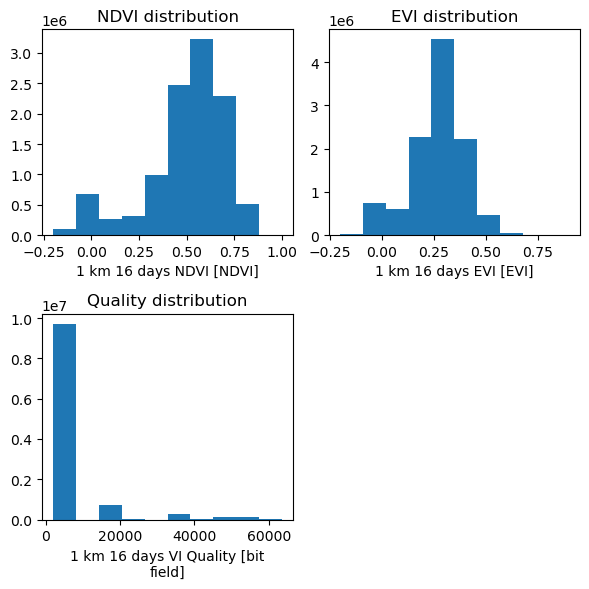

In [17]:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ds['_1_km_16_days_NDVI'].plot()
plt.title("NDVI distribution")

plt.subplot(2,2,2)
ds['_1_km_16_days_EVI'].plot()
plt.title("EVI distribution")

plt.subplot(2,2,3)
ds['_1_km_16_days_VI_Quality'].plot()
plt.title("Quality distribution")
plt.savefig("NDVI_EVI_Quality_distrib.png")
plt.show()

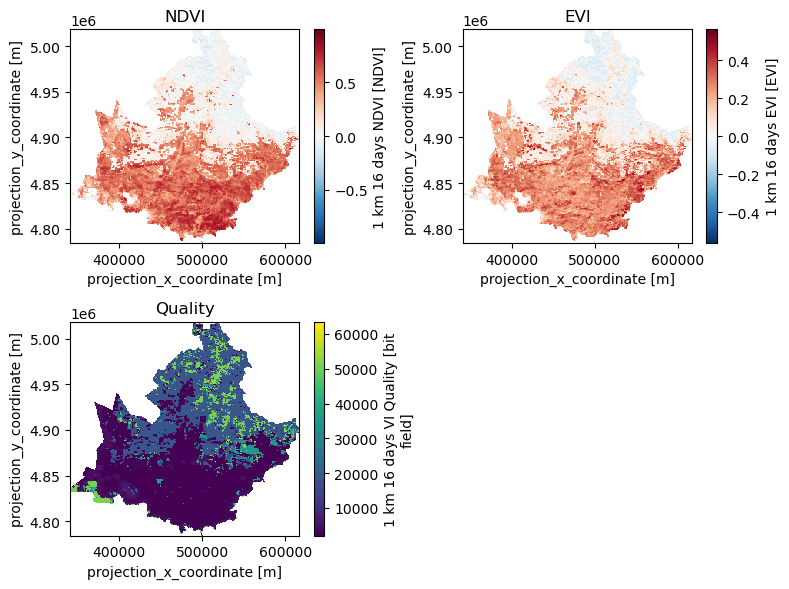

In [23]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
ds['_1_km_16_days_NDVI'][1].plot()
plt.title("NDVI")

plt.subplot(2,2,2)
ds['_1_km_16_days_EVI'][1].plot()
plt.title("EVI")

plt.subplot(2,2,3)
ds['_1_km_16_days_VI_Quality'][1].plot()
plt.title("Quality")
plt.savefig("NDVI_EVI_Quality_plot.png")
plt.show()

Plotting the variables from LAI dataset

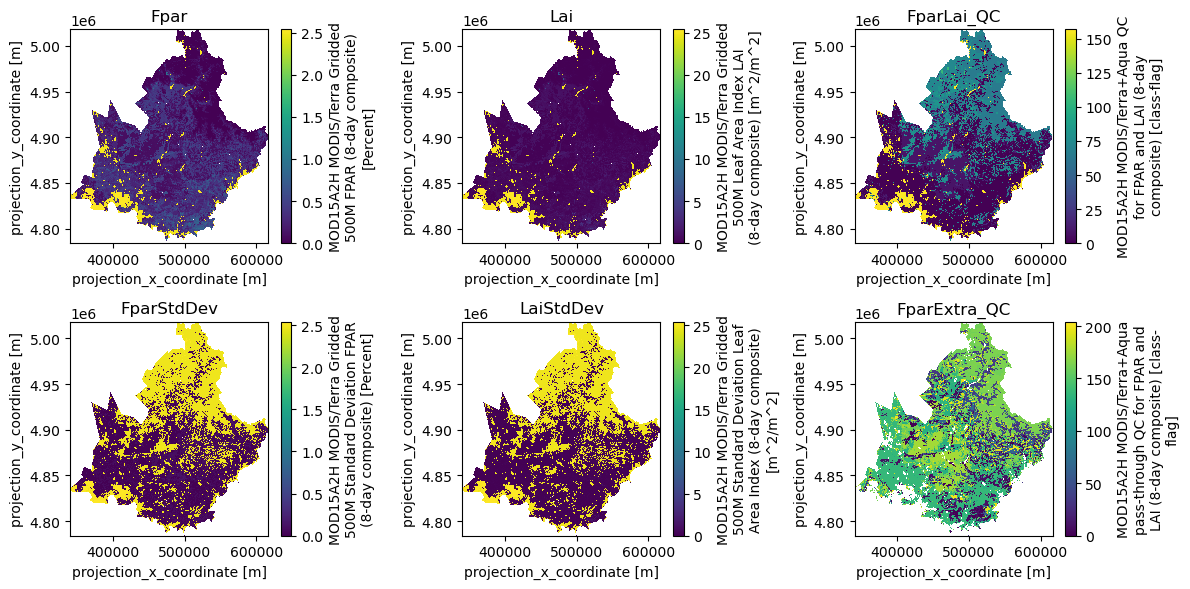

In [33]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'][1].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'][1].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'][1].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'][1].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'][1].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'][1].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_plot.png")
plt.show()

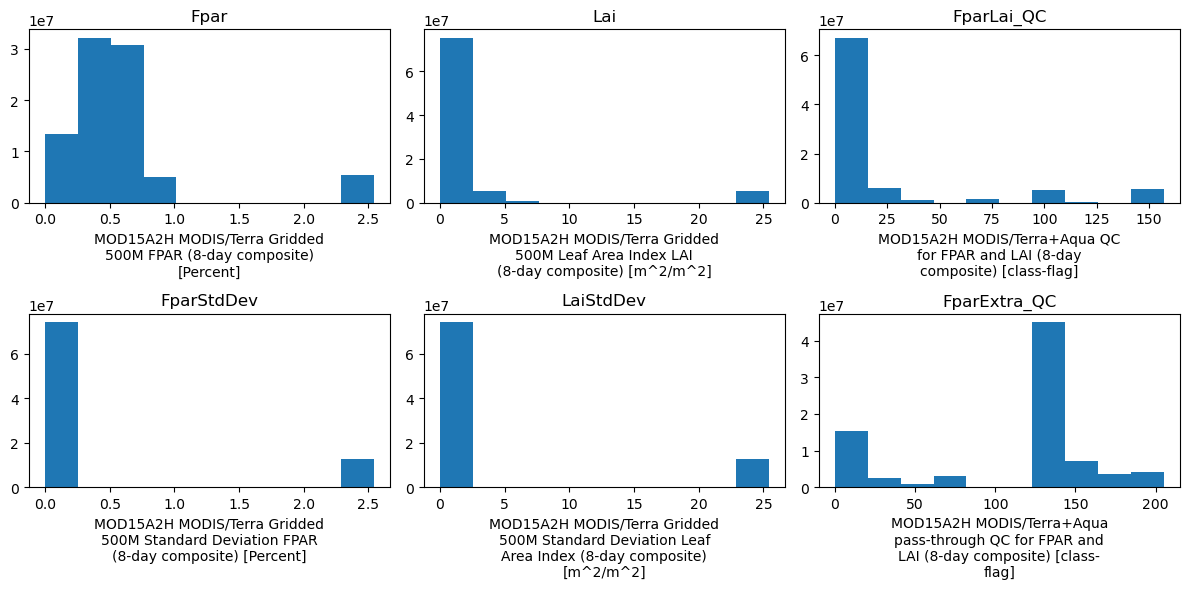

In [35]:
#PLot distribution of the variables
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,3,1)
lai['Fpar_500m'].plot()
plt.title("Fpar")

plt.subplot(2,3,2)
lai['Lai_500m'].plot()
plt.title("Lai")

plt.subplot(2,3,4)
lai['FparStdDev_500m'].plot()
plt.title("FparStdDev")

plt.subplot(2,3,5)
lai['LaiStdDev_500m'].plot()
plt.title("LaiStdDev")

plt.subplot(2,3,3)
lai['FparLai_QC'].plot()
plt.title("FparLai_QC")

plt.subplot(2,3,6)
lai['FparExtra_QC'].plot()
plt.title("FparExtra_QC")

plt.savefig("LAI_distrib.png")
plt.show()



In [48]:
# Check the coordinate system of the data
print(ds.crs)

<xarray.DataArray 'crs' ()>
array(-127, dtype=int8)
Attributes:
    grid_mapping_name:                      sinusoidal
    _CoordinateAxisTypes:                   GeoX GeoY
    spatial_ref:                            PROJCS["unknown",GEOGCS["unknown"...
    radius_of_sphere:                       6371007.181
    longitude_of_central_meridian:          0
    longitude_of_projection_origin:         0
    straight_vertical_longitude_from_pole:  0
    false_easting:                          0
    false_northing:                         0


In [49]:
# Check the spatial resolution of the data
#print(ndvi["_1_km_16_days_EVI"][0].res)